In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
import squarify
from collections import Counter
plt.style.use('../common/light.mplstyle')
COLOR_PALETTE = ['#ffa600', '#ff7c43', '#f95d6a', '#d45087', '#a05195', '#665191', '#2f4b7c', '#003f5c']

In [42]:
df = pd.read_csv('data/global_arms_transfer_2000_2023.csv')
df.sample(10)

,id,trade_id,target,source,order_date,orderYrEst,quantity,delivery_date,designation,description,category,source_lat,source_lng,target_lat,target_lng
2269,236325,38465,Sweden,United States,2002-01-01 00:00:00+00:00,True,400.0,2009-01-01 00:00:00+00:00,Paveway,guided bomb,Missiles,38.893651,-77.170630,63.442876,16.850123
2045,303977,37217,UAE,Italy,2003-01-01 00:00:00+00:00,True,6.0,2016-01-01 00:00:00+00:00,Super Rapid 76mm,naval gun,Naval weapons,42.920661,12.077566,23.875788,54.210894
552,300068,31424,Sri Lanka,Russia,2001-01-01 00:00:00+00:00,True,36.0,2001-01-01 00:00:00+00:00,BMP-2,IFV,Armoured vehicles,64.774657,98.105107,7.703576,80.666960
8777,308899,64134,Nigeria,United States,2021-01-01 00:00:00+00:00,True,48.0,NaN,F-124 (2850),turbofan,Engines,38.893651,-77.170630,9.571644,7.999782
6112,240064,58418,Afghanistan,Bosnia-Herzegovina,2012-01-01 00:00:00+00:00,True,20.0,2013-01-01 00:00:00+00:00,D-30 122mm,towed gun,Artillery,44.189769,17.813653,33.937414,66.128639
4239,230962,53303,Nigeria,France,2023-01-01 00:00:00+00:00,False,3.0,NaN,FPB-98,patrol craft,Ships,44.349371,-1.328556,9.571644,7.999782
1997,257766,36889,United States,Canada,2005-01-01 00:00:00+00:00,True,704.0,2009-01-01 00:00:00+00:00,Piranha-3 -,APC,Armoured vehicles,45.558758,-74.024002,38.893651,-77.170630
1965,303525,36707,Spain,Italy,2004-01-01 00:00:00+00:00,True,12.0,2008-01-01 00:00:00+00:00,X-TAR,air search radar,Sensors,42.920661,12.077566,40.434162,-3.614563
8055,311479,62483,Hungary,Germany,2018-01-01 00:00:00+00:00,False,24.0,NaN,PzH-2000 155mm,self-propelled gun,Artillery,51.247366,10.298068,47.211724,19.364954
6901,308565,60151,United Kingdom,France,2017-01-01 00:00:00+00:00,False,8.0,NaN,CAPTAS-4,ASW sonar,Sensors,44.349371,-1.328556,54.102802,-2.902943


In [43]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             10520 non-null  int64              
 1   trade_id       10520 non-null  int64              
 2   target         10520 non-null  object             
 3   source         10520 non-null  object             
 4   order_date     10520 non-null  datetime64[ns, UTC]
 5   orderYrEst     10516 non-null  object             
 6   quantity       10292 non-null  float64            
 7   delivery_date  8841 non-null   datetime64[ns, UTC]
 8   designation    10520 non-null  object             
 9   description    10520 non-null  object             
 10  category       10520 non-null  object             
 11  source_lat     10360 non-null  float64            
 12  source_lng     10360 non-null  float64            
 13  target_lat     10138 non-null  float64        

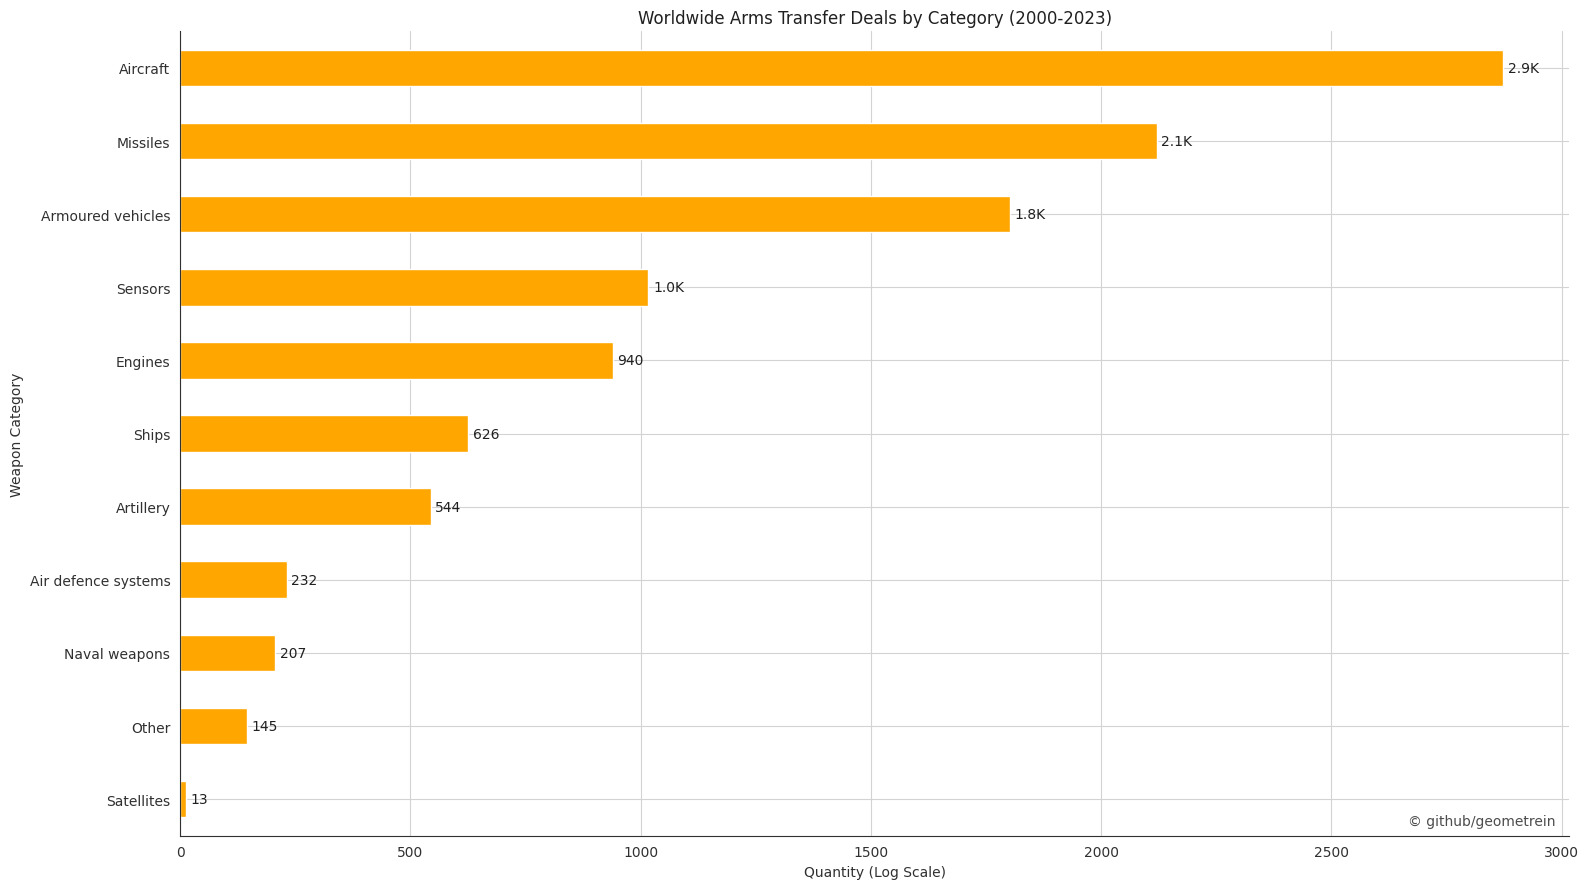

In [44]:
def plot_deals_by_category_barchart(df: pd.DataFrame) -> None:
    category_quantity = df['category'].value_counts().sort_values(ascending=True)
    # Bar chart
    plt.figure(figsize=(16, 9))
    ax = category_quantity.plot(kind='barh')
    # Annotations
    for index, value in enumerate(category_quantity):
        label = f"{value/1000:.1f}K" if value >= 1000 else str(value)
        ax.text(value+10, index, label, va='center')
    # Labels
    plt.title('Worldwide Arms Transfer Deals by Category (2000-2023)')
    plt.xlabel('Quantity (Log Scale)')
    plt.ylabel('Weapon Category')
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/deals_by_category_barchart.png')
    plt.show()

plot_deals_by_category_barchart(df)

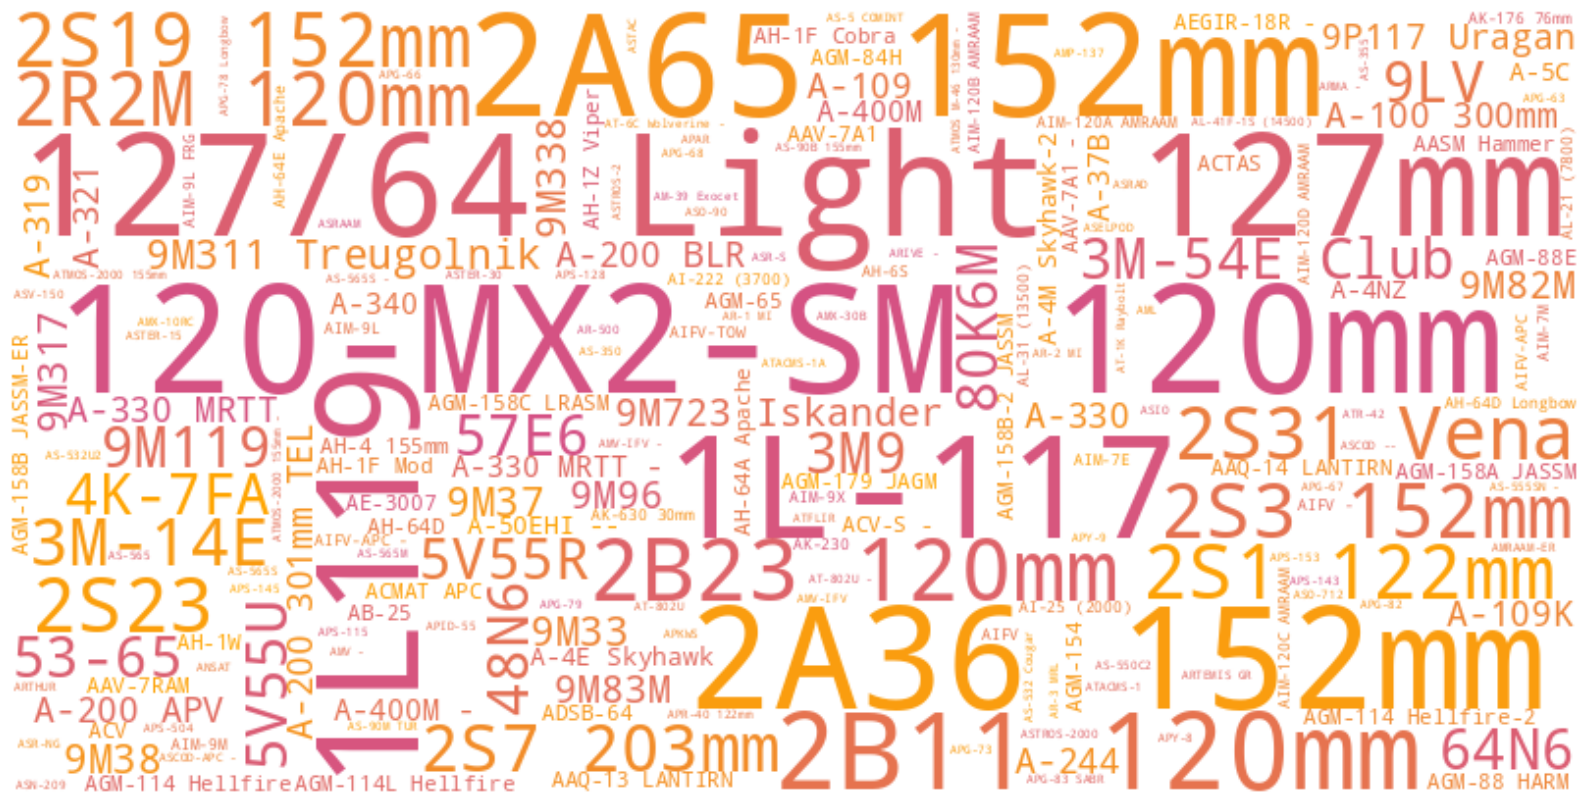

In [45]:
def generate_wordcloud(input_df: pd.DataFrame, column_name: str) -> None:
    df = input_df.copy(deep=True)
    df = df.groupby(column_name)["quantity"].sum().reset_index()
    designation_counter = Counter(df[column_name])
    fig, ax = plt.subplots(figsize=(16, 9))
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [COLOR_PALETTE[0], COLOR_PALETTE[3]])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap=cmap).generate_from_frequencies(designation_counter)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f'output/charts/{column_name}_wordcloud.png')
    plt.show()

generate_wordcloud(df, "designation")

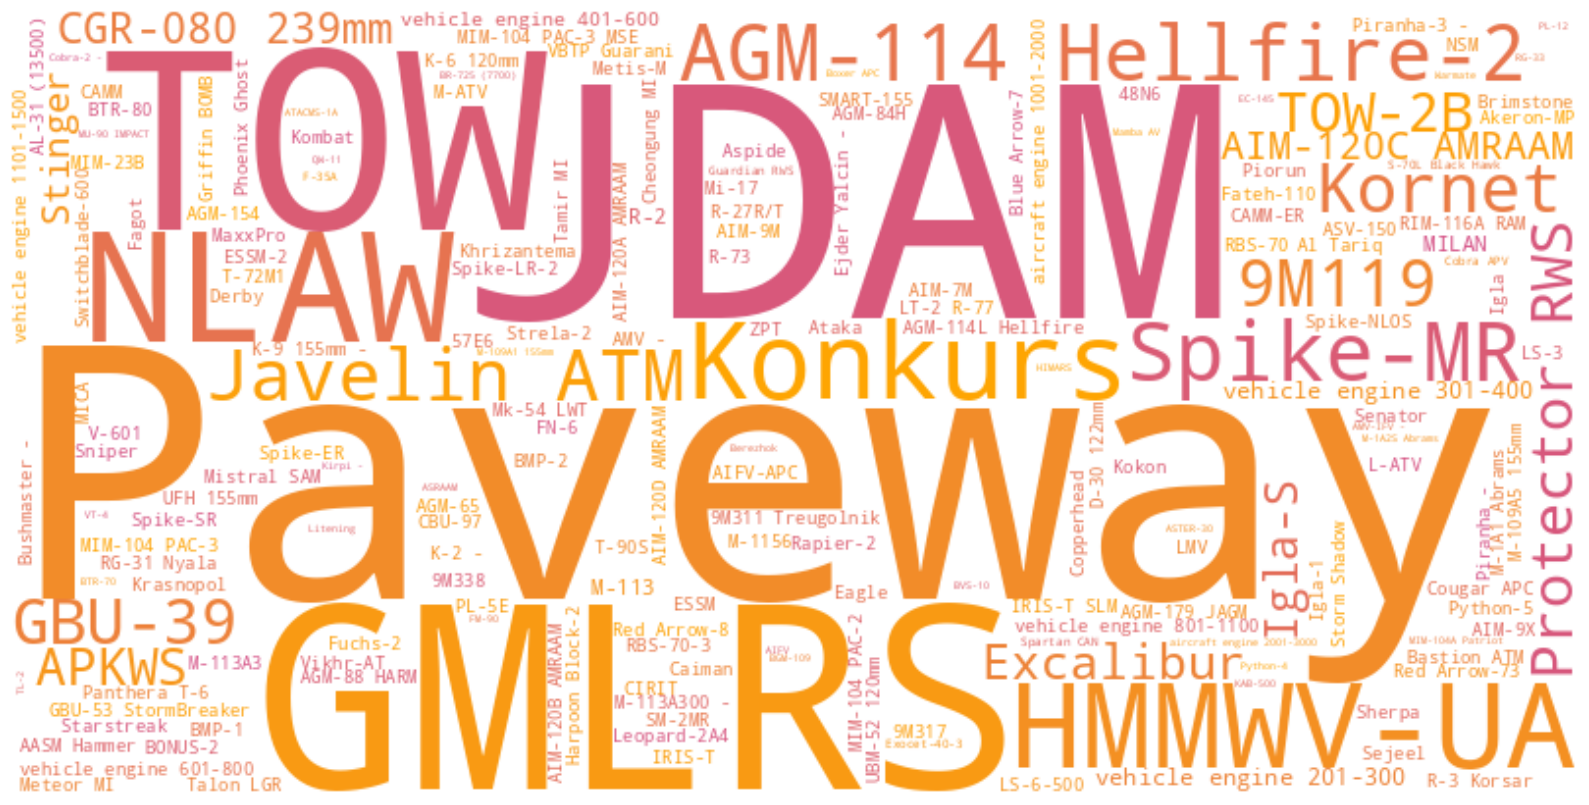

In [46]:
def generate_quantity_wordcloud(input_df: pd.DataFrame, word_column: str, size_column: str) -> None:
    df = input_df.copy(deep=True)
    df.dropna(subset=[word_column, size_column], inplace=True)
    df = df.groupby(word_column)[size_column].sum().reset_index()
    designation_counter = Counter(dict(zip(df[word_column], df[size_column])))
    fig, ax = plt.subplots(figsize=(16, 9))
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [COLOR_PALETTE[0], COLOR_PALETTE[3]])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap=cmap).generate_from_frequencies(designation_counter)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(f'output/charts/{word_column}_{size_column}_wordcloud.png')


generate_quantity_wordcloud(df, word_column='designation', size_column='quantity')

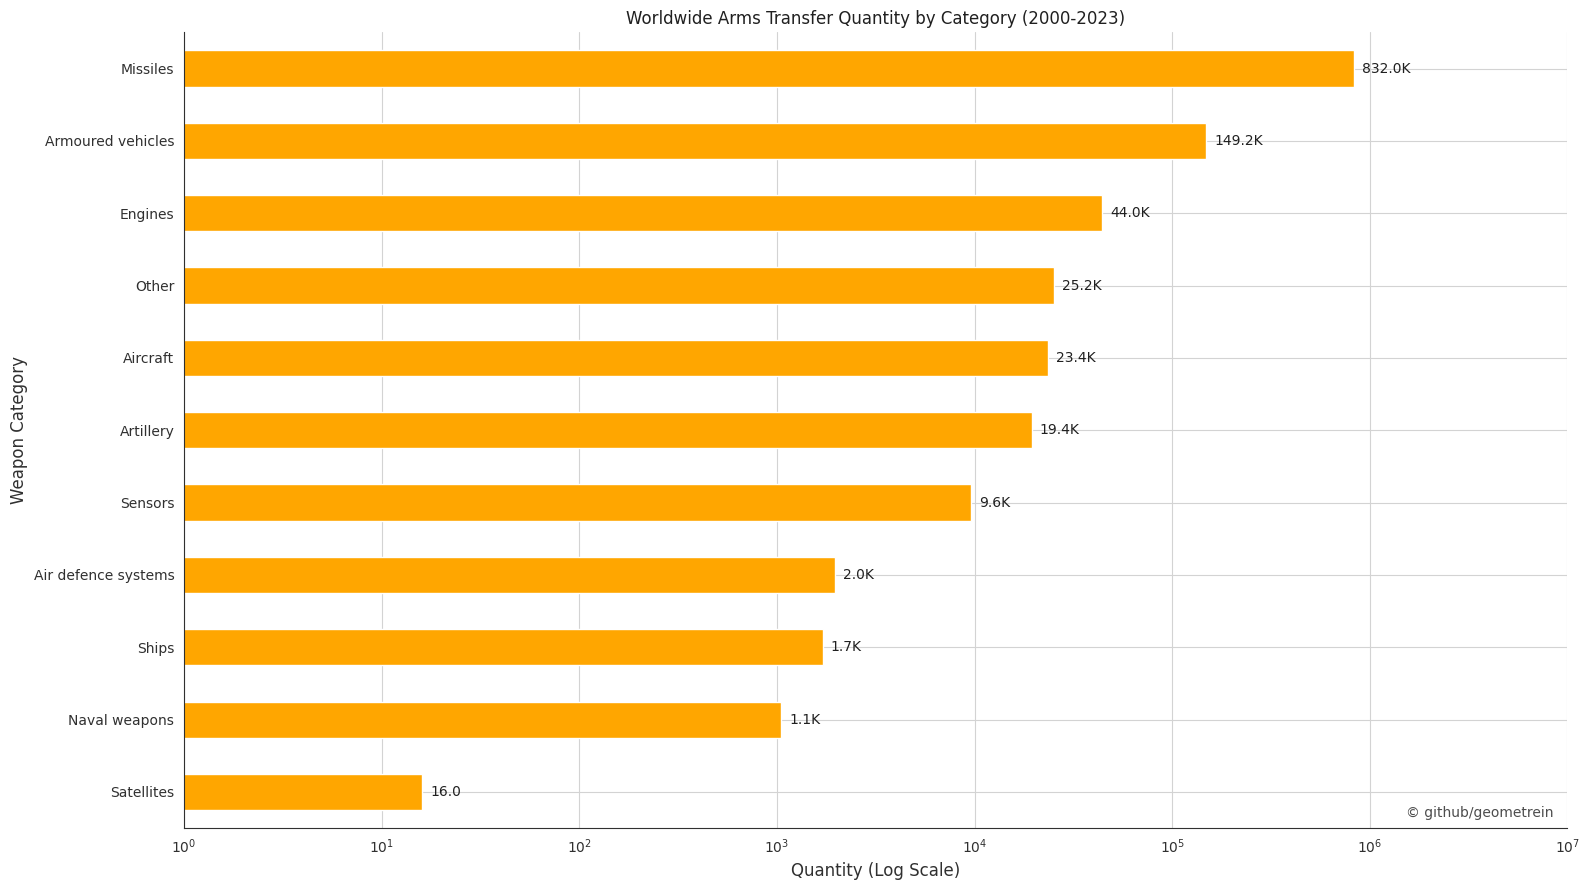

In [47]:
def plot_category_quantity_barchart(df: pd.DataFrame) -> None:
    category_quantity = df.groupby('category')['quantity'].sum().sort_values(ascending=True)
    # Bar chart
    plt.figure(figsize=(16, 9))
    ax = category_quantity.plot(kind='barh')
    # Annotations
    for index, value in enumerate(category_quantity):
        label = f"{value/1000:.1f}K" if value >= 1000 else str(value)
        ax.text(value*1.1, index, label, va='center')
    # Labels
    plt.title('Worldwide Arms Transfer Quantity by Category (2000-2023)')
    plt.xlabel('Quantity (Log Scale)', fontsize=12)
    plt.ylabel('Weapon Category', fontsize=12)
    # Axes
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    plt.xscale('log')
    ax.set_xlim(1, 1e7)
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/transfer_quantity_by_category_barchart.png')
    plt.show()
    
plot_category_quantity_barchart(df)

## Missile transfers

In [48]:
missile_df = df[df['category'] == 'Missiles']

In [49]:
def plot_largest_missile_exporters(df: pd.DataFrame) -> None:
    top_exporters = df.groupby('source')['quantity'].sum().sort_values(ascending=True).tail(10)
    # Bar chart
    fig, ax = plt.subplots(figsize=(16, 9))
    ax = top_exporters.plot(kind='barh')
    # Labels
    plt.title('Largest Missile Exporters Wordwide (2000-2023) ')
    plt.xlabel('Missile Quantity')
    plt.ylabel('Country')
    # Axes
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/largest_missile_exporters_barchart_2000_2023.png')
    plt.show()

#plot_largest_missile_exporters(df)

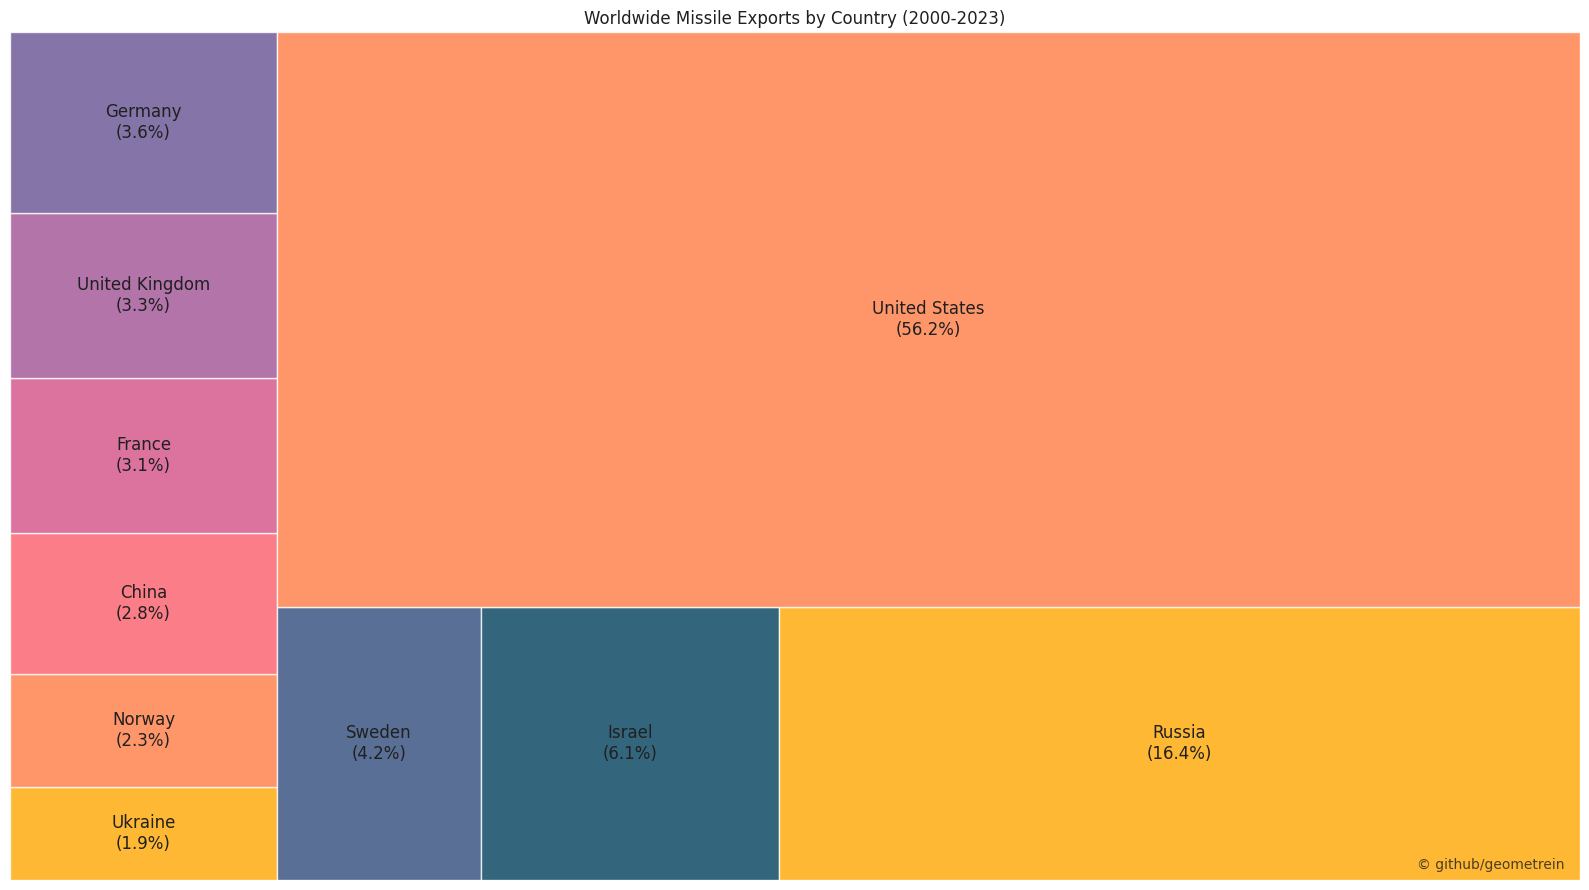

In [50]:
def plot_transfers_by_export_country_treemap(df: pd.DataFrame) -> None:
    top_exporters = df.groupby('source')['quantity'].sum().sort_values(ascending=True).tail(10)
    total_quantity = top_exporters.sum()
    
    # Custom labels with numbers and percentages
    labels = [f"{category}\n({quantity/total_quantity:.1%})" 
              for category, quantity in zip(top_exporters.index, top_exporters)]
    
    # Treemap
    plt.figure(figsize=(16, 9))
    squarify.plot(sizes=top_exporters, label=labels, color=COLOR_PALETTE, alpha=0.8, pad=False, text_kwargs={'fontsize': 12})
    
    # Labels
    plt.title('Worldwide Missile Exports by Country (2000-2023)')
    
    # Remove axes
    plt.axis('off')
    
    # Annotation
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8)
    
    # Save figure
    plt.tight_layout()
    plt.savefig('output/charts/transfers_by_export_country_treemap.png')
    plt.show()

plot_transfers_by_export_country_treemap(df)

In [51]:
def plot_largest_missile_importers(df: pd.DataFrame) -> None:
    top_exporters = df.groupby('target')['quantity'].sum().sort_values(ascending=True).tail(10)
    # Bar chart
    fig, ax = plt.subplots(figsize=(16, 9))
    ax = top_exporters.plot(kind='barh')
    # Labels
    plt.title('Largest Missile Importers Wordwide (2000-2023) ')
    plt.xlabel('Missile Quantity')
    plt.ylabel('Country')
    # Axes
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/largest_missile_importers_barchart_2000_2023.png')
    plt.show()

#plot_largest_missile_importers(df)

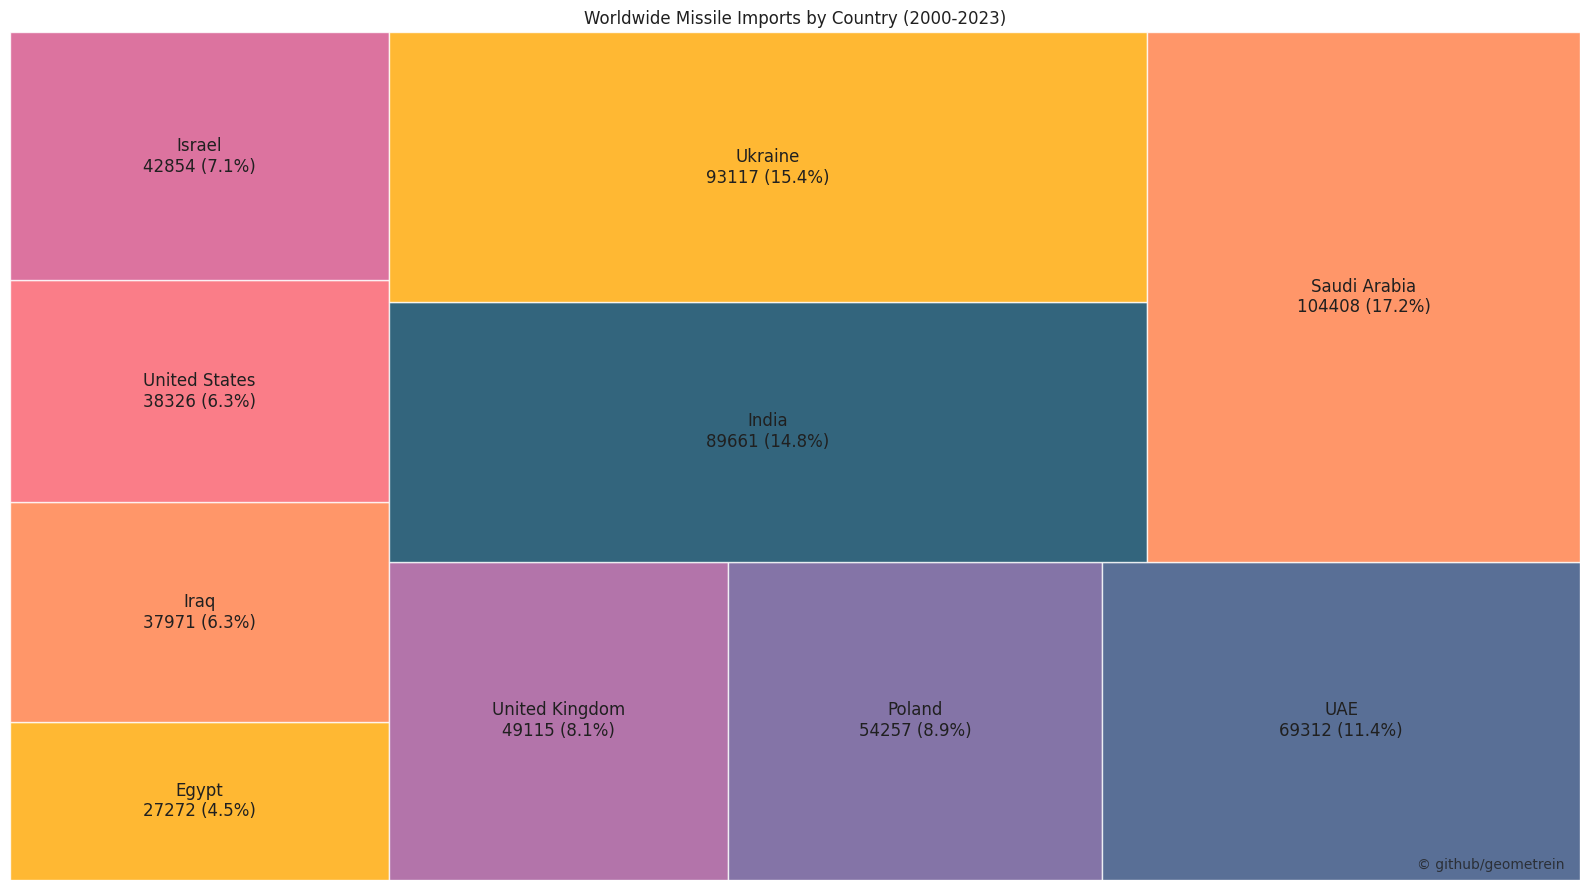

In [52]:
def plot_transfers_by_import_country_treemap(df: pd.DataFrame) -> None:
    top_exporters = df.groupby('target')['quantity'].sum().sort_values(ascending=True).tail(10)
    total_quantity = top_exporters.sum()

    # Custom labels with numbers and percentages
    labels = [f"{category}\n{int(quantity)} ({quantity / total_quantity:.1%})"
              for category, quantity in zip(top_exporters.index, top_exporters)]

    # Treemap
    plt.figure(figsize=(16, 9))
    squarify.plot(sizes=top_exporters, label=labels, color=COLOR_PALETTE, alpha=0.8, pad=False,
                  text_kwargs={'fontsize': 12})

    # Labels
    plt.title('Worldwide Missile Imports by Country (2000-2023)')

    # Remove axes
    plt.axis('off')

    # Annotation
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8)

    # Save figure
    plt.tight_layout()
    plt.savefig('output/charts/transfers_by_import_country_treemap.png')
    plt.show()


plot_transfers_by_import_country_treemap(df)

In [53]:
def barchart_per_missile_category(input_df: pd.DataFrame) -> None:
    df = input_df.copy(deep=True)
    top_categories = df.groupby('designation')['quantity'].sum().sort_values(ascending=True).tail(10)
    # Bar chart
    fig, ax = plt.subplots(figsize=(16, 9))
    top_categories.plot(kind='barh', ax=ax)
    # Labels
    plt.title('Transferred Missiles by Designation (2000-2023) ')
    plt.xlabel('Missile Quantity')
    plt.ylabel('Country')
    # Axes
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/transferred_missiles_by_designation_2000_2023.png')
    plt.show()

#barchart_per_missile_category(input_df=missile_df)

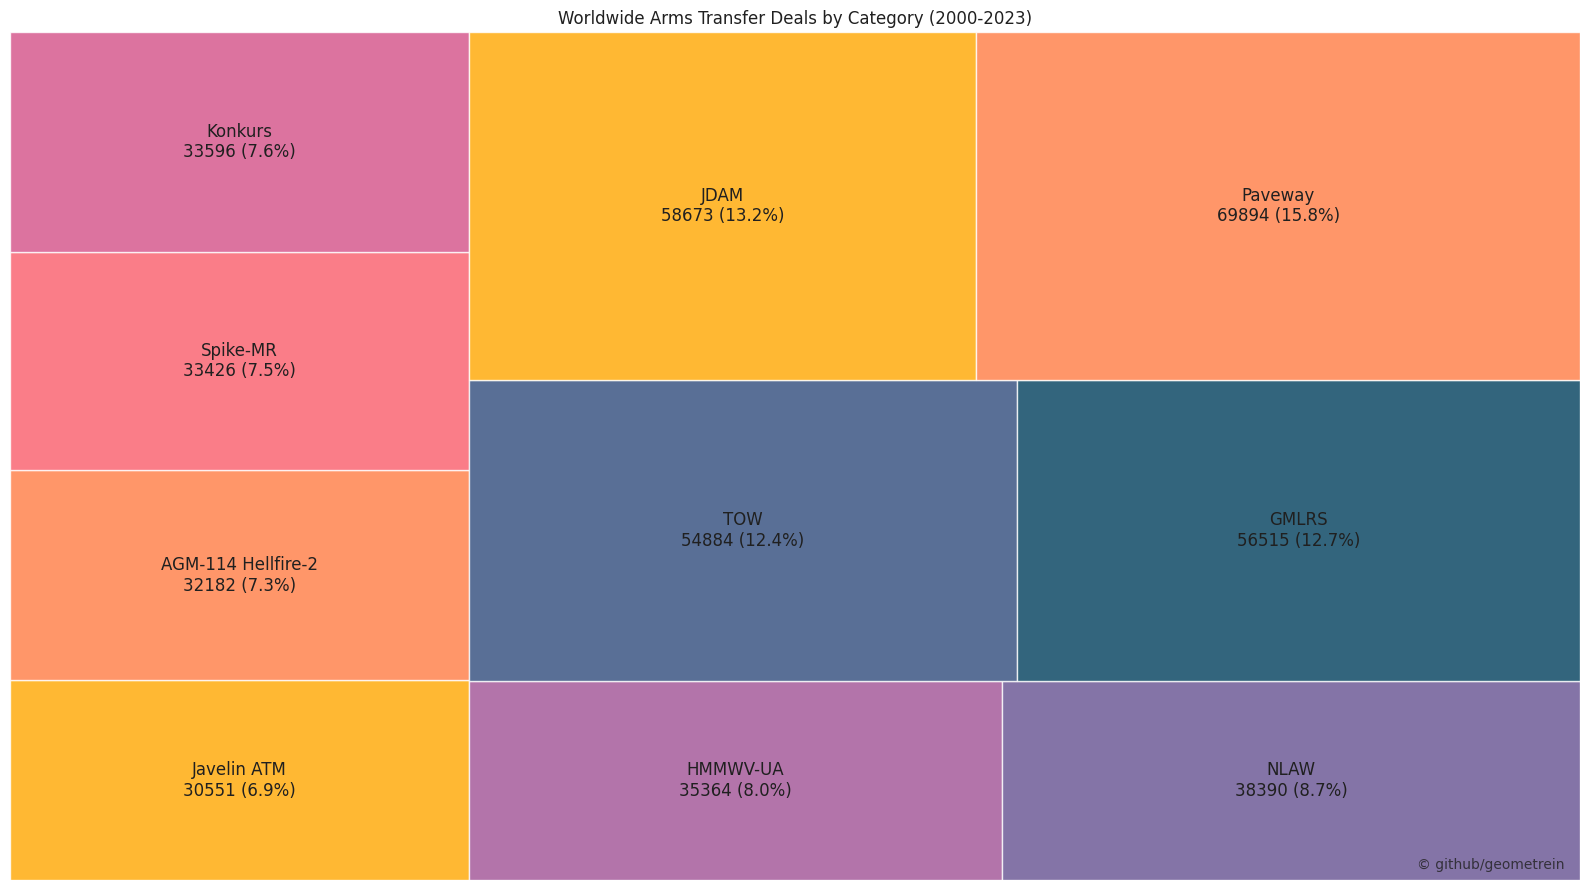

In [54]:
def plot_deals_by_category_treemap(df: pd.DataFrame) -> None:
    top_categories = df.groupby('designation')['quantity'].sum().sort_values(ascending=True).tail(10)
    total_quantity = top_categories.sum()

    # Custom labels with numbers and percentages
    labels = [f"{category}\n{int(quantity)} ({quantity / total_quantity:.1%})"
              for category, quantity in zip(top_categories.index, top_categories)]

    # Treemap
    plt.figure(figsize=(16, 9))
    squarify.plot(sizes=top_categories, label=labels, color=COLOR_PALETTE, alpha=0.8, pad=False,
                  text_kwargs={'fontsize': 12})

    # Labels
    plt.title('Worldwide Arms Transfer Deals by Category (2000-2023)')

    # Remove axes
    plt.axis('off')

    # Annotation
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8)

    # Save figure
    plt.tight_layout()
    plt.savefig('output/charts/transfers_by_missile_category_treemap.png')
    plt.show()


plot_deals_by_category_treemap(df)

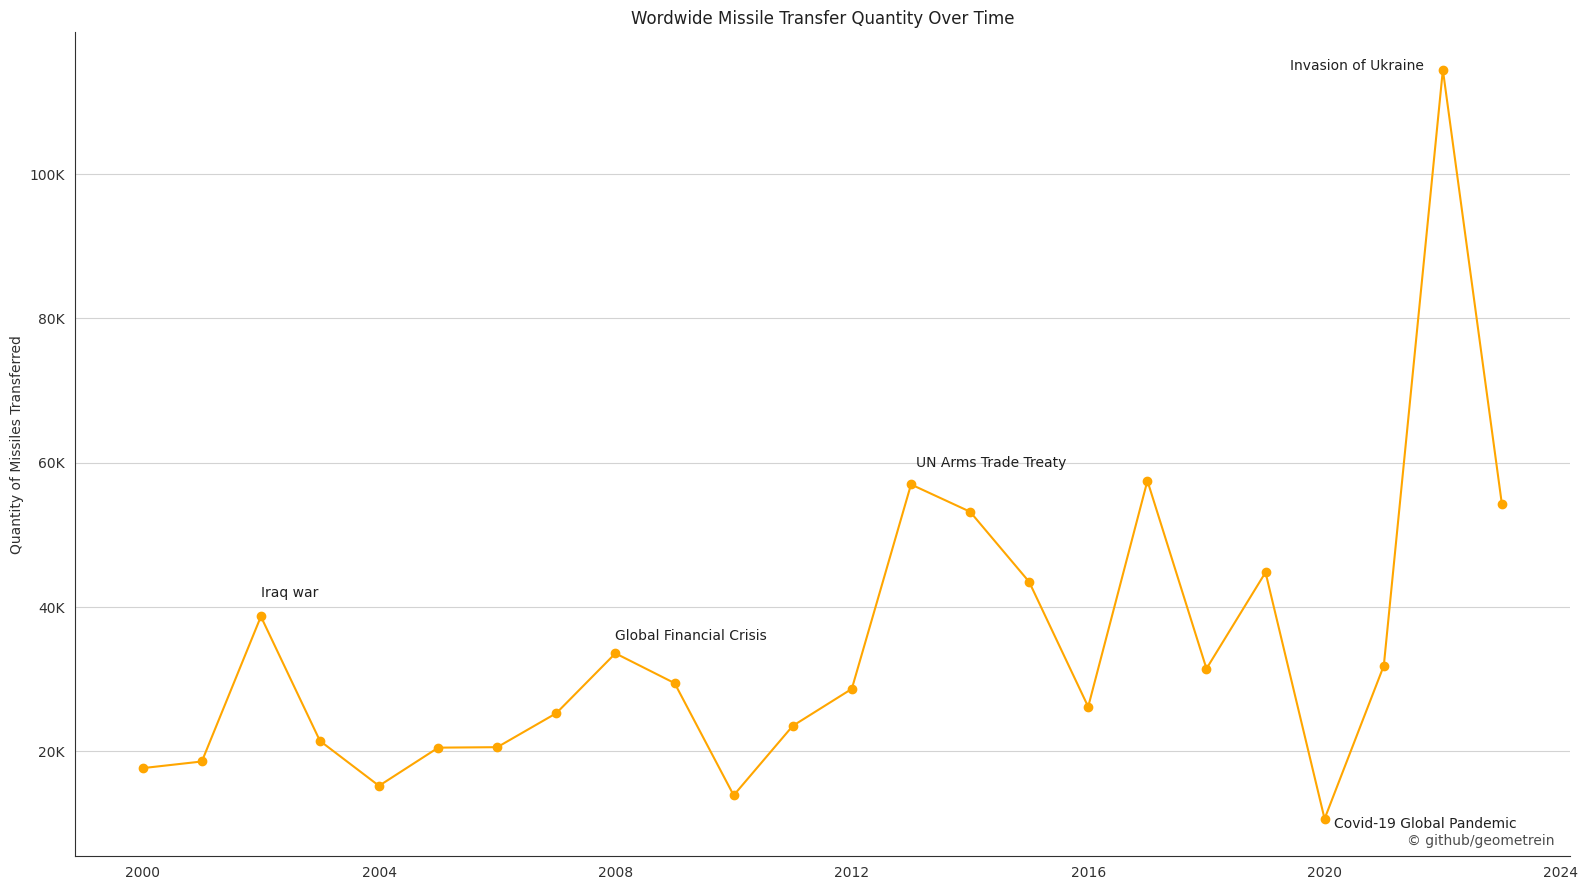

In [55]:
def plot_time_series_quantity(df: pd.DataFrame) -> None:
    time_series_data = df.groupby('order_date')['quantity'].sum()
    # Timeseries plot
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-')
    # Labels
    plt.title('Wordwide Missile Transfer Quantity Over Time')
    plt.ylabel('Quantity of Missiles Transferred')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    # Events
    plt.gca().text(pd.to_datetime("2002-01-01"), 4.2*10**4, "Iraq war", va='center')
    plt.gca().text(pd.to_datetime("2008-01-01"), 3.6*10**4, "Global Financial Crisis", va='center')
    plt.gca().text(pd.to_datetime("2013-02-01"), 6*10**4, "UN Arms Trade Treaty", va='center')
    plt.gca().text(pd.to_datetime("2020-03-01"), 10**4, "Covid-19 Global Pandemic", va='center')
    plt.gca().text(pd.to_datetime("2019-06-01"), 1.15*10**5, "Invasion of Ukraine", va='center')
    # Layout
    plt.tight_layout()
    plt.annotate('© github/geometrein', xy=(0.99, 0.01), xycoords='axes fraction',
                 verticalalignment='bottom', horizontalalignment='right', alpha=0.8
    )
    plt.savefig('output/charts/missile_transfer_quantity_timeseries.png')
    plt.show()

# Use the function with the sample dataframe with dates
plot_time_series_quantity(missile_df)

In [56]:
def export_sunburst_chat_json(input_df: pd.DataFrame, min_missiles_per_country: int = 5000, min_missiles_per_designation: int = 3000) -> None:
    """This method is used to export the data for E charts sunburst visualization"""
    df = input_df.copy(deep=True)
    df = df.groupby(['source', 'designation'])['quantity'].sum().reset_index()
    # Sum quantities by country
    country_totals = df.groupby('source')['quantity'].sum()
    # Identify countries with quantity smaller than min_missiles_per_country
    small_countries = country_totals[country_totals < min_missiles_per_country].index
    # Create a new column 'grouped_country' where small countries are labeled as 'Other'
    df['grouped_country'] = df['source'].apply(lambda x: 'Other' if x in small_countries else x)

    sunburst_data = []
    for country, group in df.groupby('grouped_country'):
        country_data = {
            'name': country,
            'children': []
        }
        designation_totals = group.groupby('designation')['quantity'].sum()
        small_designations = designation_totals[designation_totals < min_missiles_per_designation].index
        for designation, sub_group in group.groupby('designation'):
            if designation in small_designations:
                designation = ''
            quantity = sub_group['quantity'].sum()
            font_size = 12
            other_exists = False
            for child in country_data['children']:
                if child['name'] == 'Other Countries':
                    child['value'] += quantity
                    other_exists = True
                    break
            if not other_exists:
                designation_data = {
                    'name': designation,
                    'value': quantity,
                    'label': {
                        'fontSize': font_size
                    }
                }
                country_data['children'].append(designation_data)
        sunburst_data.append(country_data)
    
    # Optionally, save to a file
    with open('output/html_charts/sunburst_countries_missile_designation.json', 'w') as f:
        json.dump(sunburst_data, f, indent=2)

export_sunburst_chat_json(missile_df)